# STROKE PREDICTION ANALYSIS
### Author: EZRA BETT


In [ ]:
#importing libraries
import kagglehub
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import warnings
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

warnings.filterwarnings("ignore")

In [ ]:
# Download dataset from Kaggle and get the local path
original_path = kagglehub.dataset_download("mahatiratusher/stroke-risk-prediction-dataset")

#locate data from the directory
csv_file = os.path.join(original_path, "stroke_risk_dataset.csv")

#load data to pandas DF
stroke_data = pd.read_csv(csv_file)

#First 5 rows
stroke_data.head()



,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
0,0,1,1,1,0,0,0,1,1,1,0,1,1,0,0,54,58.0,1
1,0,0,1,0,0,1,0,0,0,0,1,0,1,1,0,49,40.5,0
2,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,62,52.0,1
3,1,0,1,1,0,1,1,1,1,1,1,0,0,0,0,48,60.0,1
4,0,0,1,0,0,1,0,1,0,1,1,0,0,1,1,61,56.5,1


## EXPLOTRATORY DATA ANALYSIS

#### Dataframe structure/information

In [264]:
#info of the dataset
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Chest Pain                      70000 non-null  int64  
 1   Shortness of Breath             70000 non-null  int64  
 2   Irregular Heartbeat             70000 non-null  int64  
 3   Fatigue & Weakness              70000 non-null  int64  
 4   Dizziness                       70000 non-null  int64  
 5   Swelling (Edema)                70000 non-null  int64  
 6   Pain in Neck/Jaw/Shoulder/Back  70000 non-null  int64  
 7   Excessive Sweating              70000 non-null  int64  
 8   Persistent Cough                70000 non-null  int64  
 9   Nausea/Vomiting                 70000 non-null  int64  
 10  High Blood Pressure             70000 non-null  int64  
 11  Chest Discomfort (Activity)     70000 non-null  int64  
 12  Cold Hands/Feet                 

My dataset consist of `16` featurs, `2` target variables and `70000` rows of data points. The predominant data type is `int64` except for one of the target variables which is in `float64`. All columns are complete and there isn't any missing value which is good.
#### Summary statistics
Numerical values known as summary statistics are used to characterize and condense a dataset's characteristics, including its distribution form, dispersion, and central tendency. The mean, median, standard deviation, lowest, and maximum values are typical examples.

In [265]:
#summary statistics
stroke_data.describe()

,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,0.501871,0.496471,0.498886,0.500100,0.503043,0.500557,0.499186,0.503671,0.500800,0.501943,0.500643,0.499557,0.498871,0.500686,0.499871,54.056429,55.558771,0.649200
std,0.500000,0.499991,0.500002,0.500004,0.499994,0.500003,0.500003,0.499990,0.500003,0.500000,0.500003,0.500003,0.500002,0.500003,0.500004,21.071567,14.300898,0.477224
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,5.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,45.500000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,54.000000,55.500000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,72.000000,66.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,90.000000,100.000000,1.000000


The summary statistics show that most features in the stroke dataset are binary, with values ranging between 0 and 1, and a nearly even distribution around the mean (approximately 0.5), indicating no strong class imbalance for most symptoms. The Age variable ranges from 18 to 90 years with a mean of about 54, while the Stroke Risk (%) has an average of 55.6% and varies widely (std ≈ 14.3), suggesting diverse stroke risk levels across the sample.
#### Outliers
Data points that diverge substantially from the rest of the data are known as outliers.  They may be from data entry errors, measurement variability, or real but uncommon events. They might be either very high or low values that significantly differ from previous observations.  Outliers can distort statistical analyses and impact model performance, therefore it's critical to recognize and manage them.
I will use boxplots to identify any outliers in the dataset.

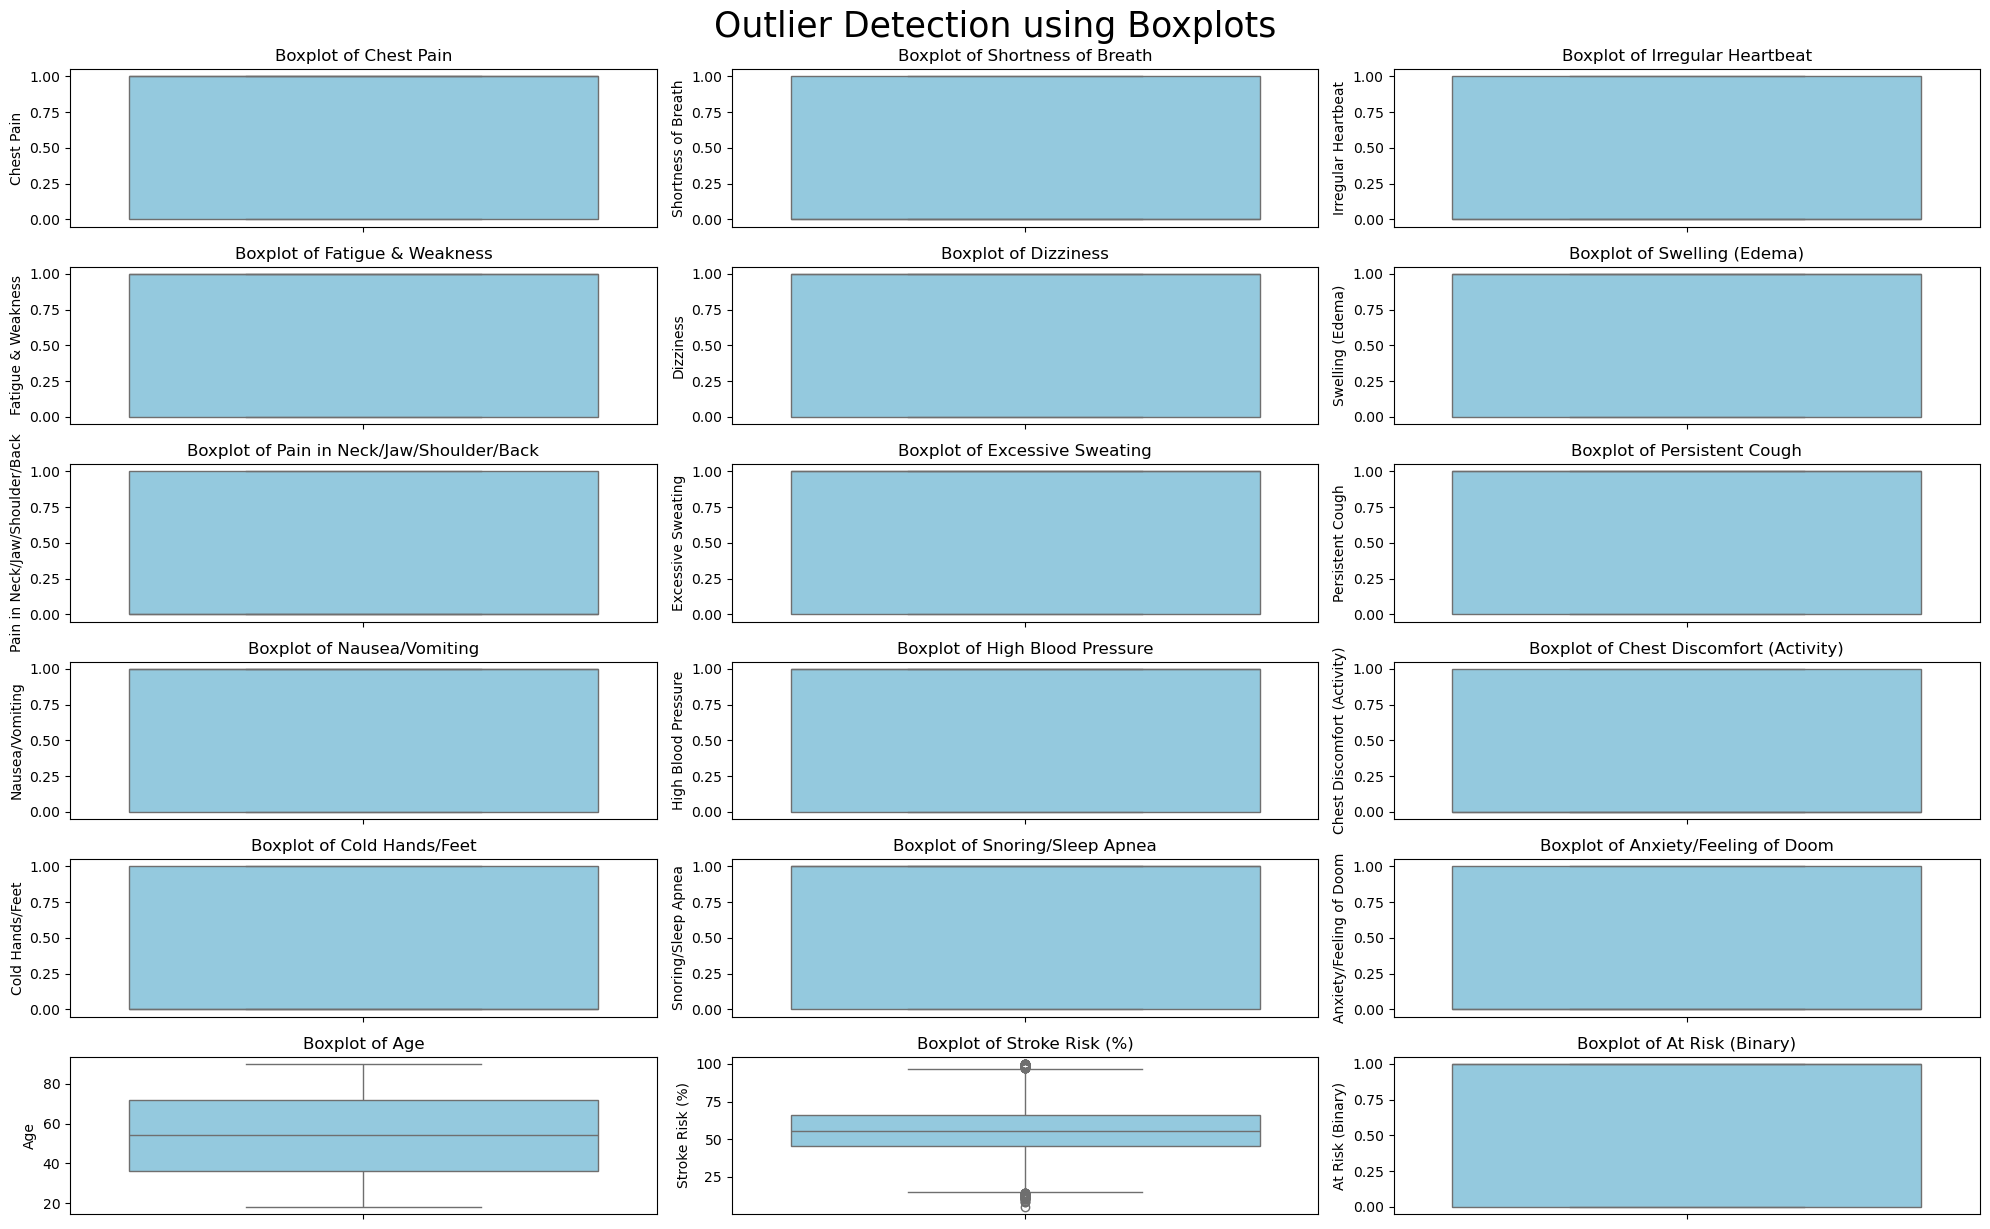

In [266]:
# Filter numerical columns
numerical_cols = stroke_data.select_dtypes(include=['number']).columns

# Set figure size
plt.figure(figsize=(20, 12))

# Create subplots
for i, col in enumerate(numerical_cols, 1):
    plt.subplot((len(numerical_cols) + 2) // 3, 3, i)
    sns.boxplot(y=stroke_data[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.suptitle("Outlier Detection using Boxplots", fontsize=25, y=1.02)
plt.show()


Looking at the output of the above visual, it is evident that we don't have outliers in our features. The data is well-distributed and there are no extreme values that could be considered as outliers. This is not the case though for one of our target variables, `Stroke risk %`, there seem to be some outliers. This can be caused by patients having a high risk or low risk of getting stroke due to their age and health conditions. I will investigate this further on the next steps of my exploratory analysis.
#### Duplicates
It is always nice to check for duplicates as they can lead to biased analysis, inaccurate model training, and inflated statistics by over-representing certain observations. Removing duplicates ensures the integrity and reliability of the dataset.

In [267]:
#Checking for duplicates
stroke_data.duplicated().sum()

1021

I have a total of `1021` duplicates in my data. I will investigate them more before deciding to keep or drop them.

In [268]:
# Check how many duplicates exist
duplicate_rows = stroke_data[stroke_data.duplicated()]
print("Number of duplicates:", duplicate_rows.shape[0])
duplicate_rows.head(15)


Number of duplicates: 1021


,Chest Pain,Shortness of Breath,Irregular Heartbeat,Fatigue & Weakness,Dizziness,Swelling (Edema),Pain in Neck/Jaw/Shoulder/Back,Excessive Sweating,Persistent Cough,Nausea/Vomiting,High Blood Pressure,Chest Discomfort (Activity),Cold Hands/Feet,Snoring/Sleep Apnea,Anxiety/Feeling of Doom,Age,Stroke Risk (%),At Risk (Binary)
1519,0,1,1,1,1,1,1,0,0,1,1,0,0,1,0,77,74.5,1
1594,1,1,0,0,0,0,1,1,0,1,1,0,0,1,1,41,51.5,1
3483,0,0,1,0,1,1,0,0,1,1,0,1,1,0,1,59,60.5,1
3655,0,0,0,1,1,0,0,0,0,1,1,1,1,1,1,56,59.0,1
3912,0,1,1,0,0,0,1,0,0,1,1,0,1,1,0,66,59.0,1
4641,1,1,1,1,0,1,1,0,0,0,0,0,0,1,1,28,45.0,0
7134,1,1,0,1,0,0,1,0,0,1,1,0,0,0,1,38,45.0,0
7304,1,1,1,0,1,0,0,1,0,1,0,1,1,1,0,37,54.5,1
7350,0,1,0,0,1,0,0,0,1,1,1,0,1,0,1,29,40.5,0
7645,1,0,0,0,0,1,1,0,0,0,1,0,1,0,1,57,49.5,0


These rows are not exact duplicates, as not all values are completely identical. Some entries may appear similar but differ slightly in features such as age, stroke risk percentage, or binary symptom indicators. As a result, they might represent different individuals with similar medical profiles rather than duplicate records. In this case I will keep the "duplicate" records as they are not totally identical.

After checking for null values, duplicates, outliers and the summary statistics in my data and ensuring all these issues have been addressed, I will head straight to the next step which is univariate, bivariate and multivariate analysis.
#### Univariate data analysis
Univariate data analysis involves examining each variable in a dataset individually to understand its distribution and characteristics.The goal is to identify patterns, detect anomalies, and gain insights into how each variable behaves on its own.

In [269]:
columns = stroke_data.columns
columns

Index(['Chest Pain', 'Shortness of Breath', 'Irregular Heartbeat',
       'Fatigue & Weakness', 'Dizziness', 'Swelling (Edema)',
       'Pain in Neck/Jaw/Shoulder/Back', 'Excessive Sweating',
       'Persistent Cough', 'Nausea/Vomiting', 'High Blood Pressure',
       'Chest Discomfort (Activity)', 'Cold Hands/Feet', 'Snoring/Sleep Apnea',
       'Anxiety/Feeling of Doom', 'Age', 'Stroke Risk (%)',
       'At Risk (Binary)'],
      dtype='object')

In [270]:
#function to plot histograms in one figure
def plot_histograms(data, columns, n_rows, n_cols):
    plt.figure(figsize=(20, 20))
    for i, col in enumerate(columns, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(data[col], kde=True, color='skyblue')
        plt.title(f'Histogram of {col}')
        plt.tight_layout()
    plt.suptitle("Histograms of Numerical Features", fontsize=25, y=1.02)
    plt.show()

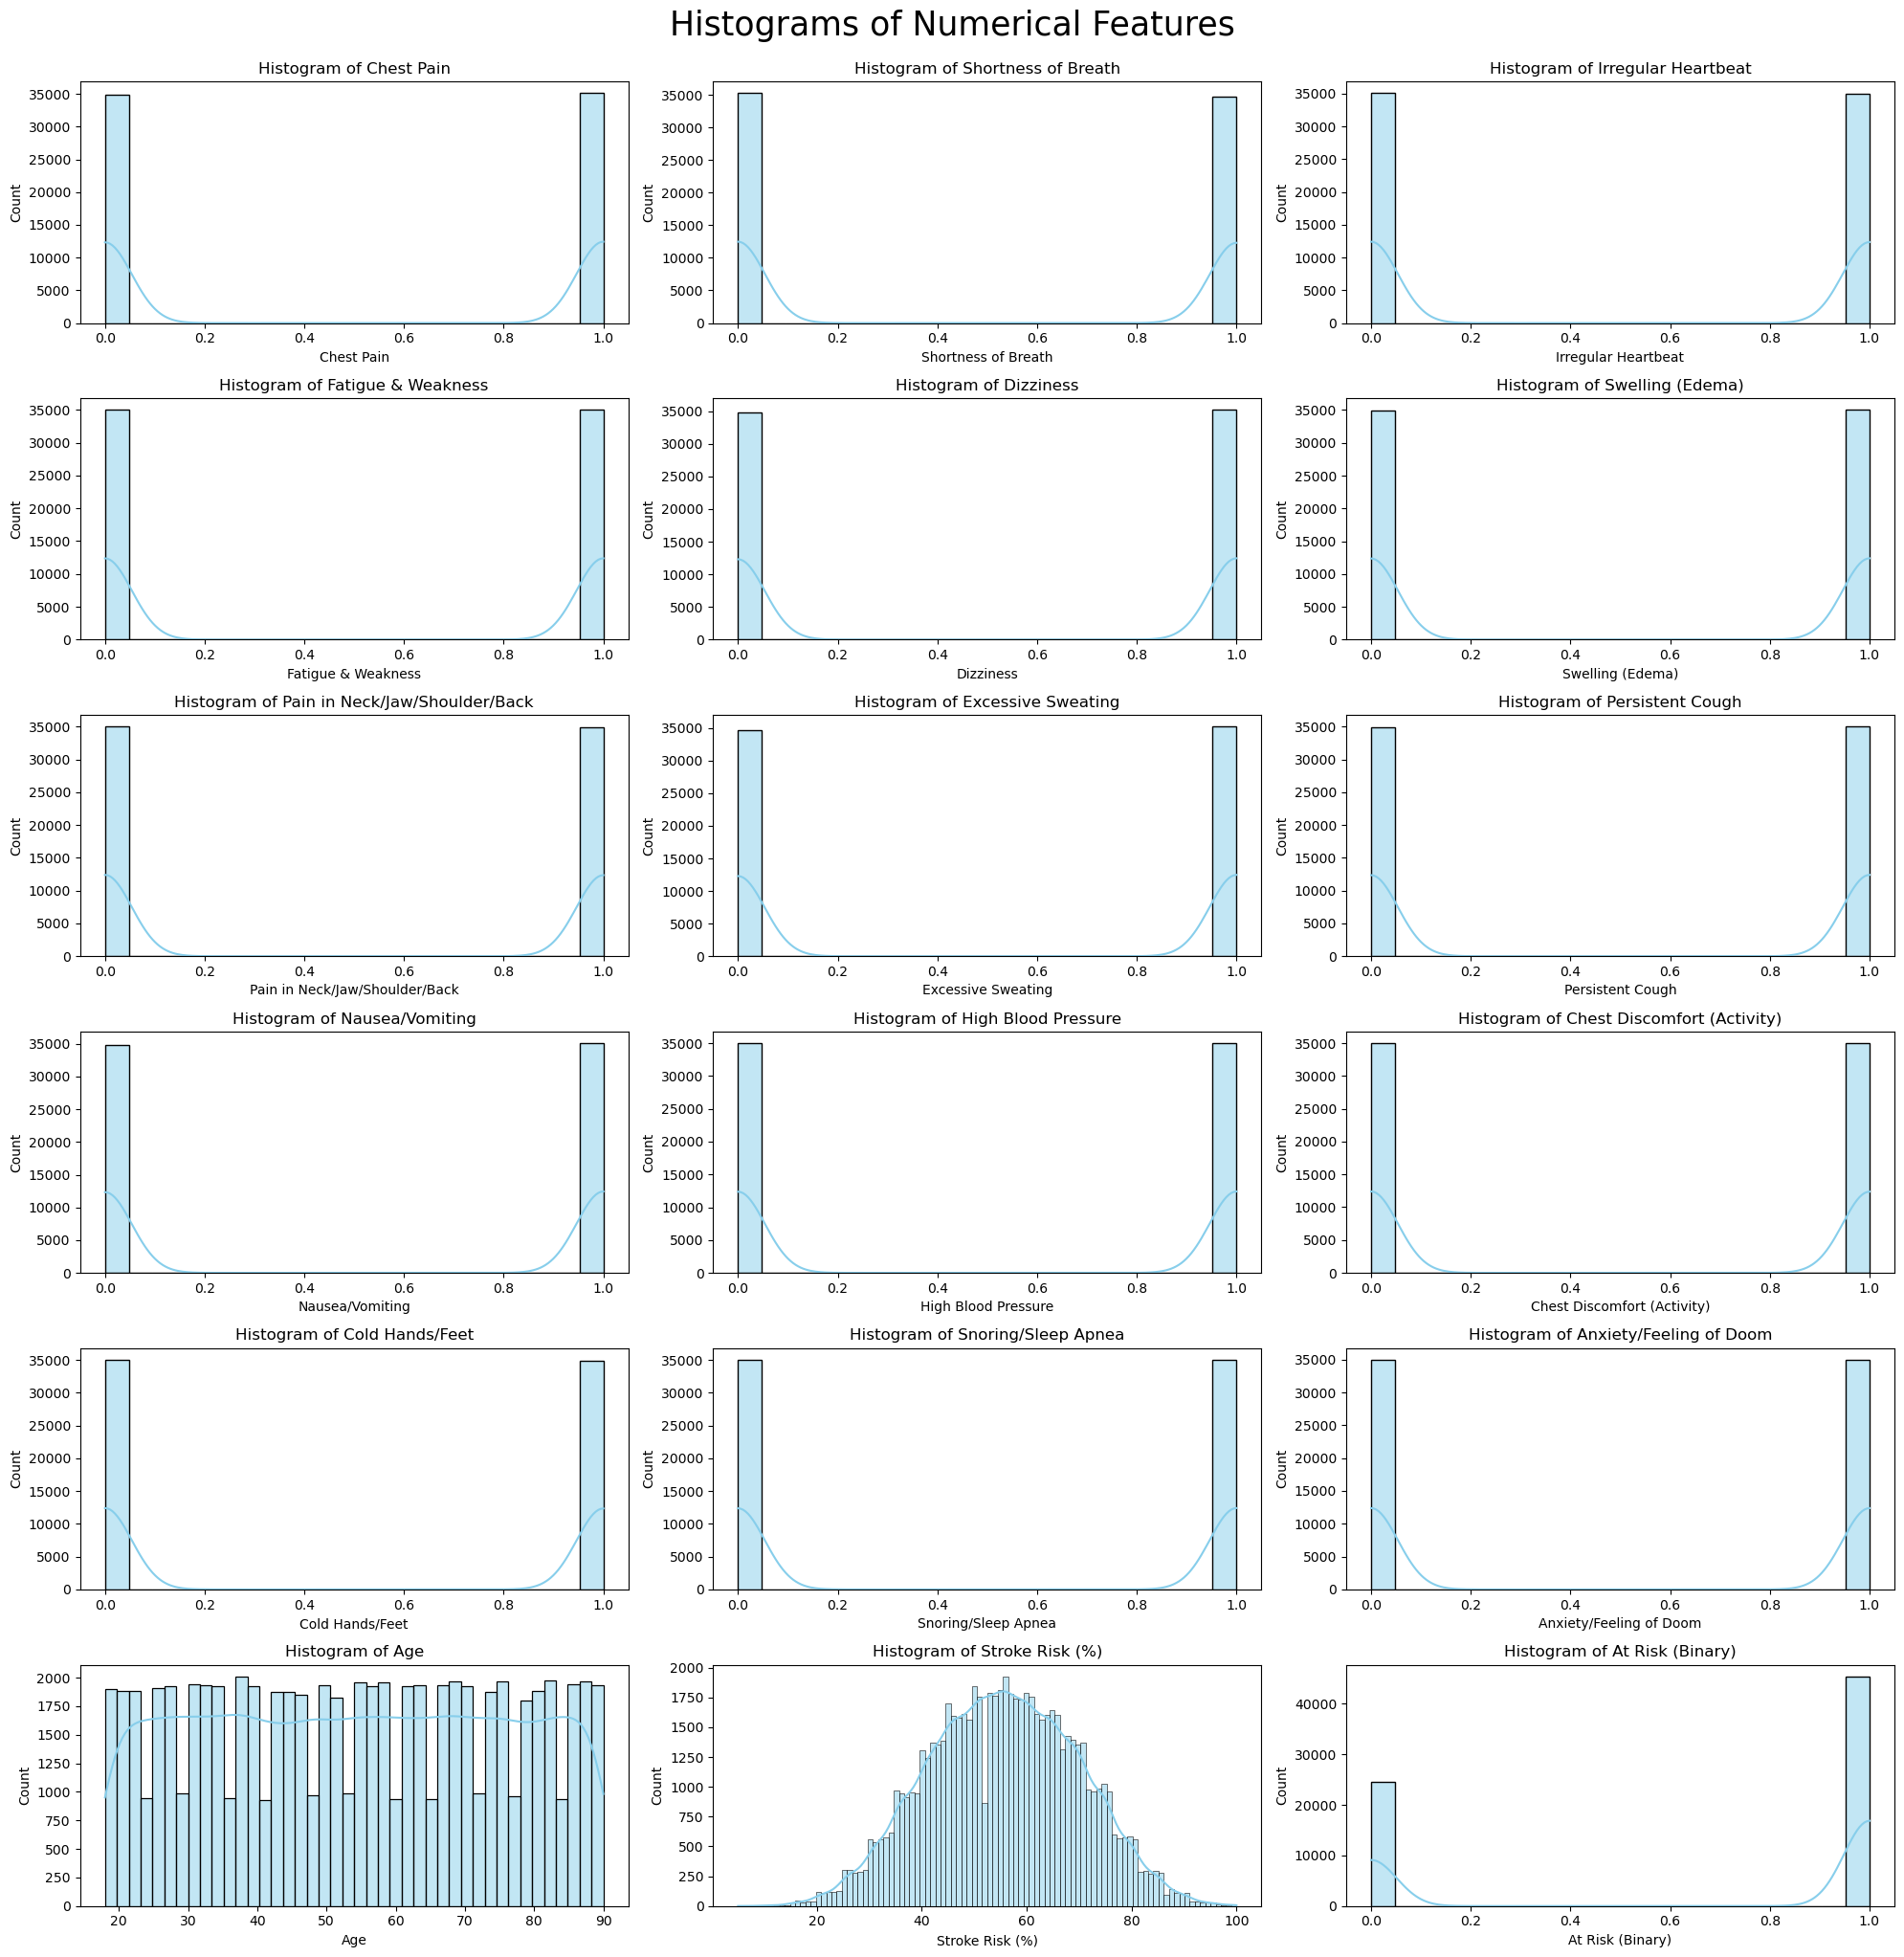

In [271]:
plot_histograms(stroke_data, columns, 6, 3)

The distribution plots of the stroke prediction dataset show that most symptom-related features are binary, with values concentrated at 0 and 1, indicating the presence or absence of specific conditions. These features appear relatively balanced, which is beneficial for training classification models. The age variable is uniformly distributed across the range of 18 to 90, ensuring diverse representation. Stroke risk (%) follows an approximately gaussian distribution centered around 55%, suggesting most individuals fall into a moderate-risk category. However, the "At Risk (Binary)" variable is heavily skewed toward 1, indicating class imbalance that could affect model performance and may require resampling or class-weight adjustments during modeling.

Remember the outliers in the `Stroke Risk (%)` column, looking at the distribution, it seems to go upto 100%. This doesn't make sense to my problem since if the prediction is 100% that means the person already suffered from stroke or is dead. My aim goal is to predict the risk of stroke for a person, not the certainty of stroke. I will plot the distribution of `Stroke Risk (%)` before and after removing the outliers and look at the difference.

In [272]:
#IQR to remove outliers
'Stroke Risk (%)'
Q1 = stroke_data['Stroke Risk (%)'].quantile(0.25)
Q3 = stroke_data['Stroke Risk (%)'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
#new df with outliers removed
without_outliers = stroke_data[(stroke_data['Stroke Risk (%)'] >= lower_bound) & (stroke_data['Stroke Risk (%)'] <= upper_bound)]


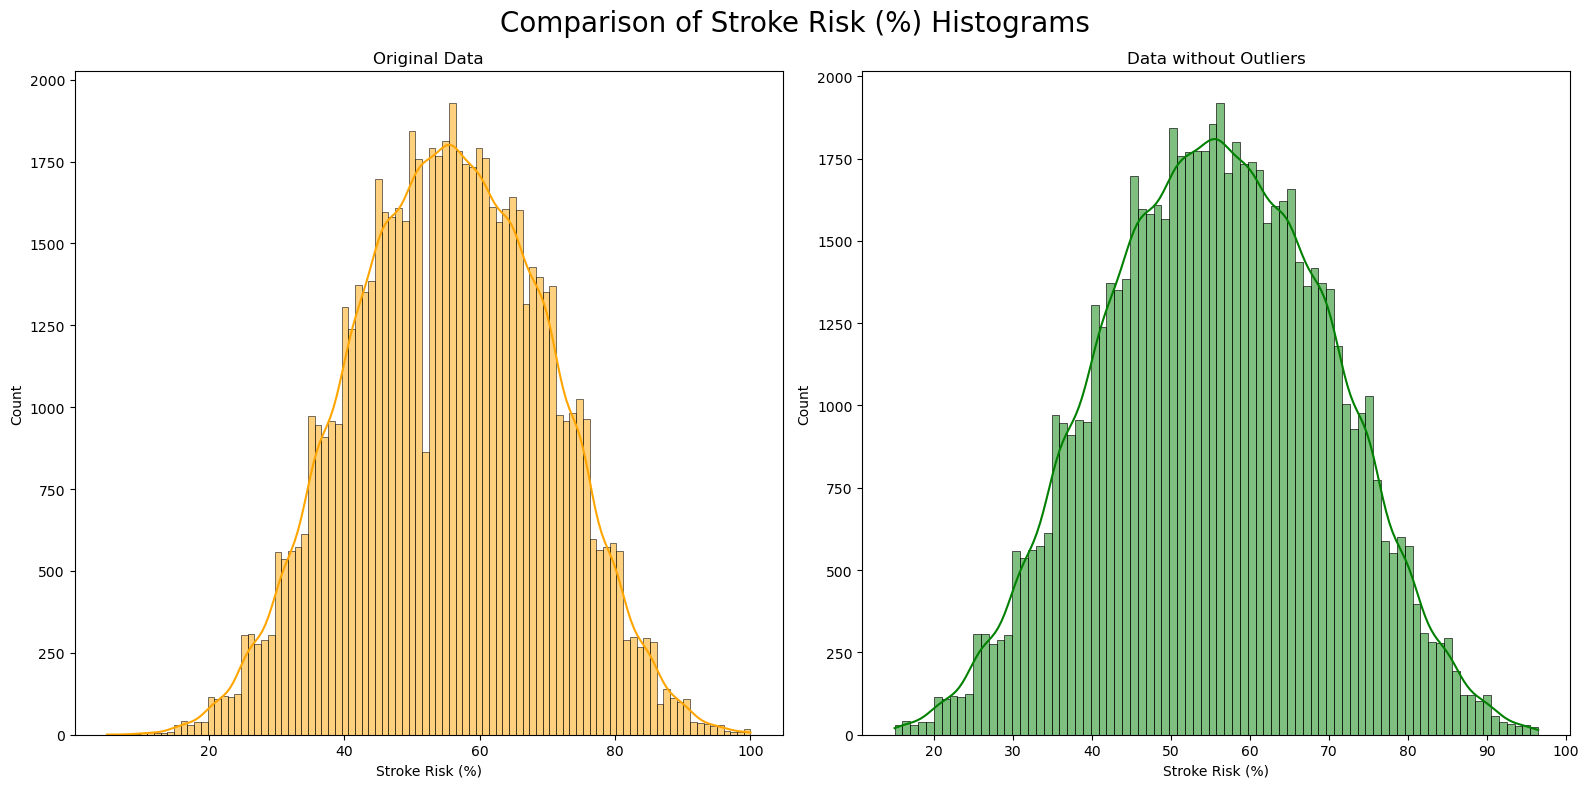

In [273]:
#plottimg histograms for original and outlier-removed data
def plot_side_by_side_histograms(data1, data2, column, title1, title2):
    plt.figure(figsize=(16, 8))
    
    # Plot histogram for the first dataset
    plt.subplot(1, 2, 1)
    sns.histplot(data1[column], kde=True, color='orange')
    plt.title(title1)
    
    # Plot histogram for the second dataset
    plt.subplot(1, 2, 2)
    sns.histplot(data2[column], kde=True, color='green')
    plt.title(title2)
    
    plt.suptitle(f'Comparison of {column} Histograms', fontsize=20)
    plt.tight_layout()
    plt.show()
    
plot_side_by_side_histograms(stroke_data, without_outliers, 'Stroke Risk (%)', 'Original Data', 'Data without Outliers')

After removing the outliers, the data spreads up to almost 95%. This meets my research and I will drop the outliers at this point. Looking at plots, the one without outliers has a well defined bell shape and has a smooth curve than the one with outliers.
#### Bivariate data analysis
In order to comprehend how one variable may affect or relate to another, this section looks at the relationship between two variables.  It assists in locating any potential correlations, patterns, or trends between an independent and dependent variable.

##### How common the risk label is within the symptom groups

In [274]:
def multivariate_xcountplot_all(data, target="At Risk (Binary)"):
    # Get all columns except target
    features = data.columns
    max_cols = 3  
    # Filter for categorical or binary features
    categorical_features = [col for col in features if data[col].nunique() <= 10]
    
    n = len(categorical_features)
    n_rows = (n + max_cols - 1) // max_cols

    plt.figure(figsize=(6 * max_cols, 5 * n_rows))

    for i, col in enumerate(categorical_features, 1):
        plt.subplot(n_rows, max_cols, i)
        sns.countplot(x=col, data=data, hue=target, palette="viridis")
        plt.title(f'{col} vs {target}')
        plt.xticks(rotation=45)
        plt.legend(loc="best")
        plt.tight_layout()

    plt.suptitle('Multivariate Count Plots (Categorical Features vs Target)', fontsize=18, y=1.02)
    plt.show()


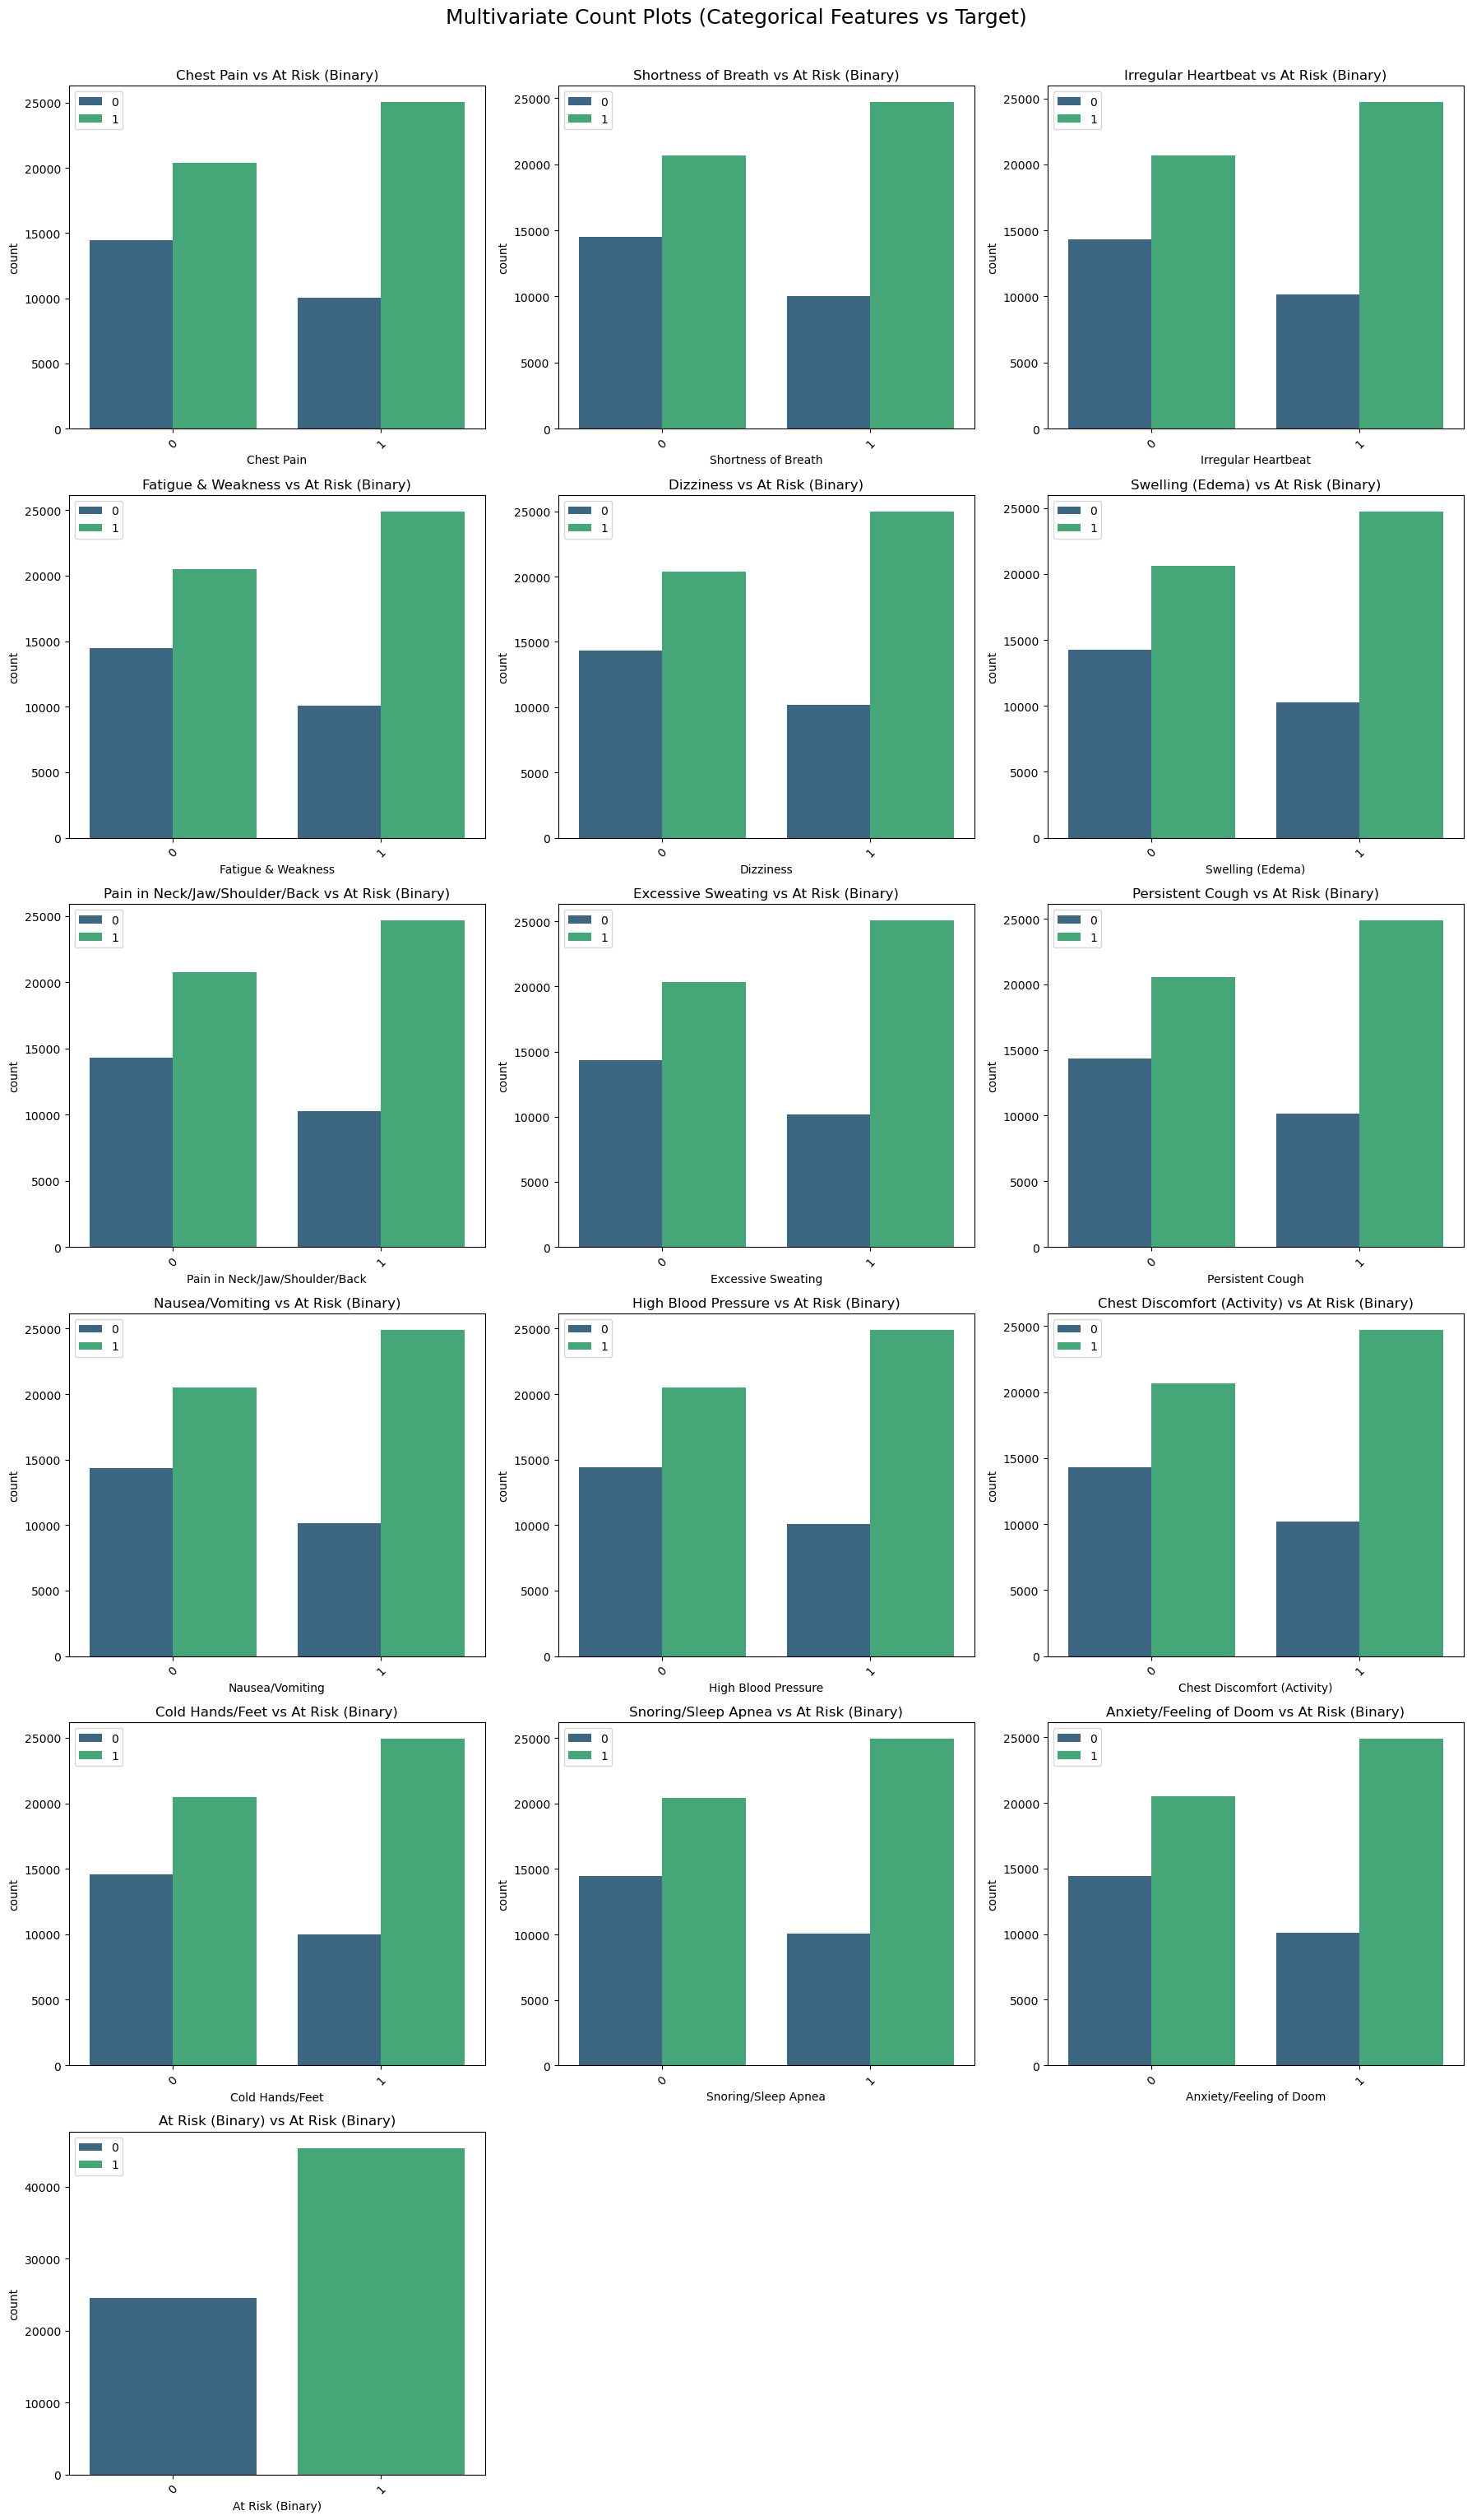

In [275]:
multivariate_xcountplot_all(without_outliers)

People who report having symptoms including chest discomfort, shortness of breath, irregular heartbeat, exhaustion, dizziness, and others are more likely to be labeled as "At Risk" for stroke, according to the multivariate count plots, which indicate a similar pattern across all symptoms.  In each instance, the number of people who are at risk is significantly greater among those who have the symptom than among those who do not.  The predictive usefulness of these variables is highlighted by this trend, which points to a strong positive correlation between the presence of symptoms and the classification of stroke risk.  The importance of these binary symptom characteristics in identifying people who are more at risk is generally supported by the visual data.

In [276]:
def multivariate_boxplot_all(data, target="Stroke Risk (%)"):
    # Get all columns except the target
    features = data.columns.drop(target)
    max_cols = 3

    # Filter for binary/categorical features
    categorical_features = [col for col in features if data[col].nunique() <= 10 and data[col].dtype != 'object']

    n = len(categorical_features)
    n_rows = (n + max_cols - 1) // max_cols

    plt.figure(figsize=(6 * max_cols, 5 * n_rows))

    for i, col in enumerate(categorical_features, 1):
        plt.subplot(n_rows, max_cols, i)
        sns.boxplot(x=col, y=target, data=data, palette="viridis")
        plt.title(f'{col} vs {target}')
        plt.xticks(rotation=45)
        plt.tight_layout()

    plt.suptitle('Multivariate Box Plots (Binary Features vs Continuous Target)', fontsize=18, y=1.02)
    plt.show()


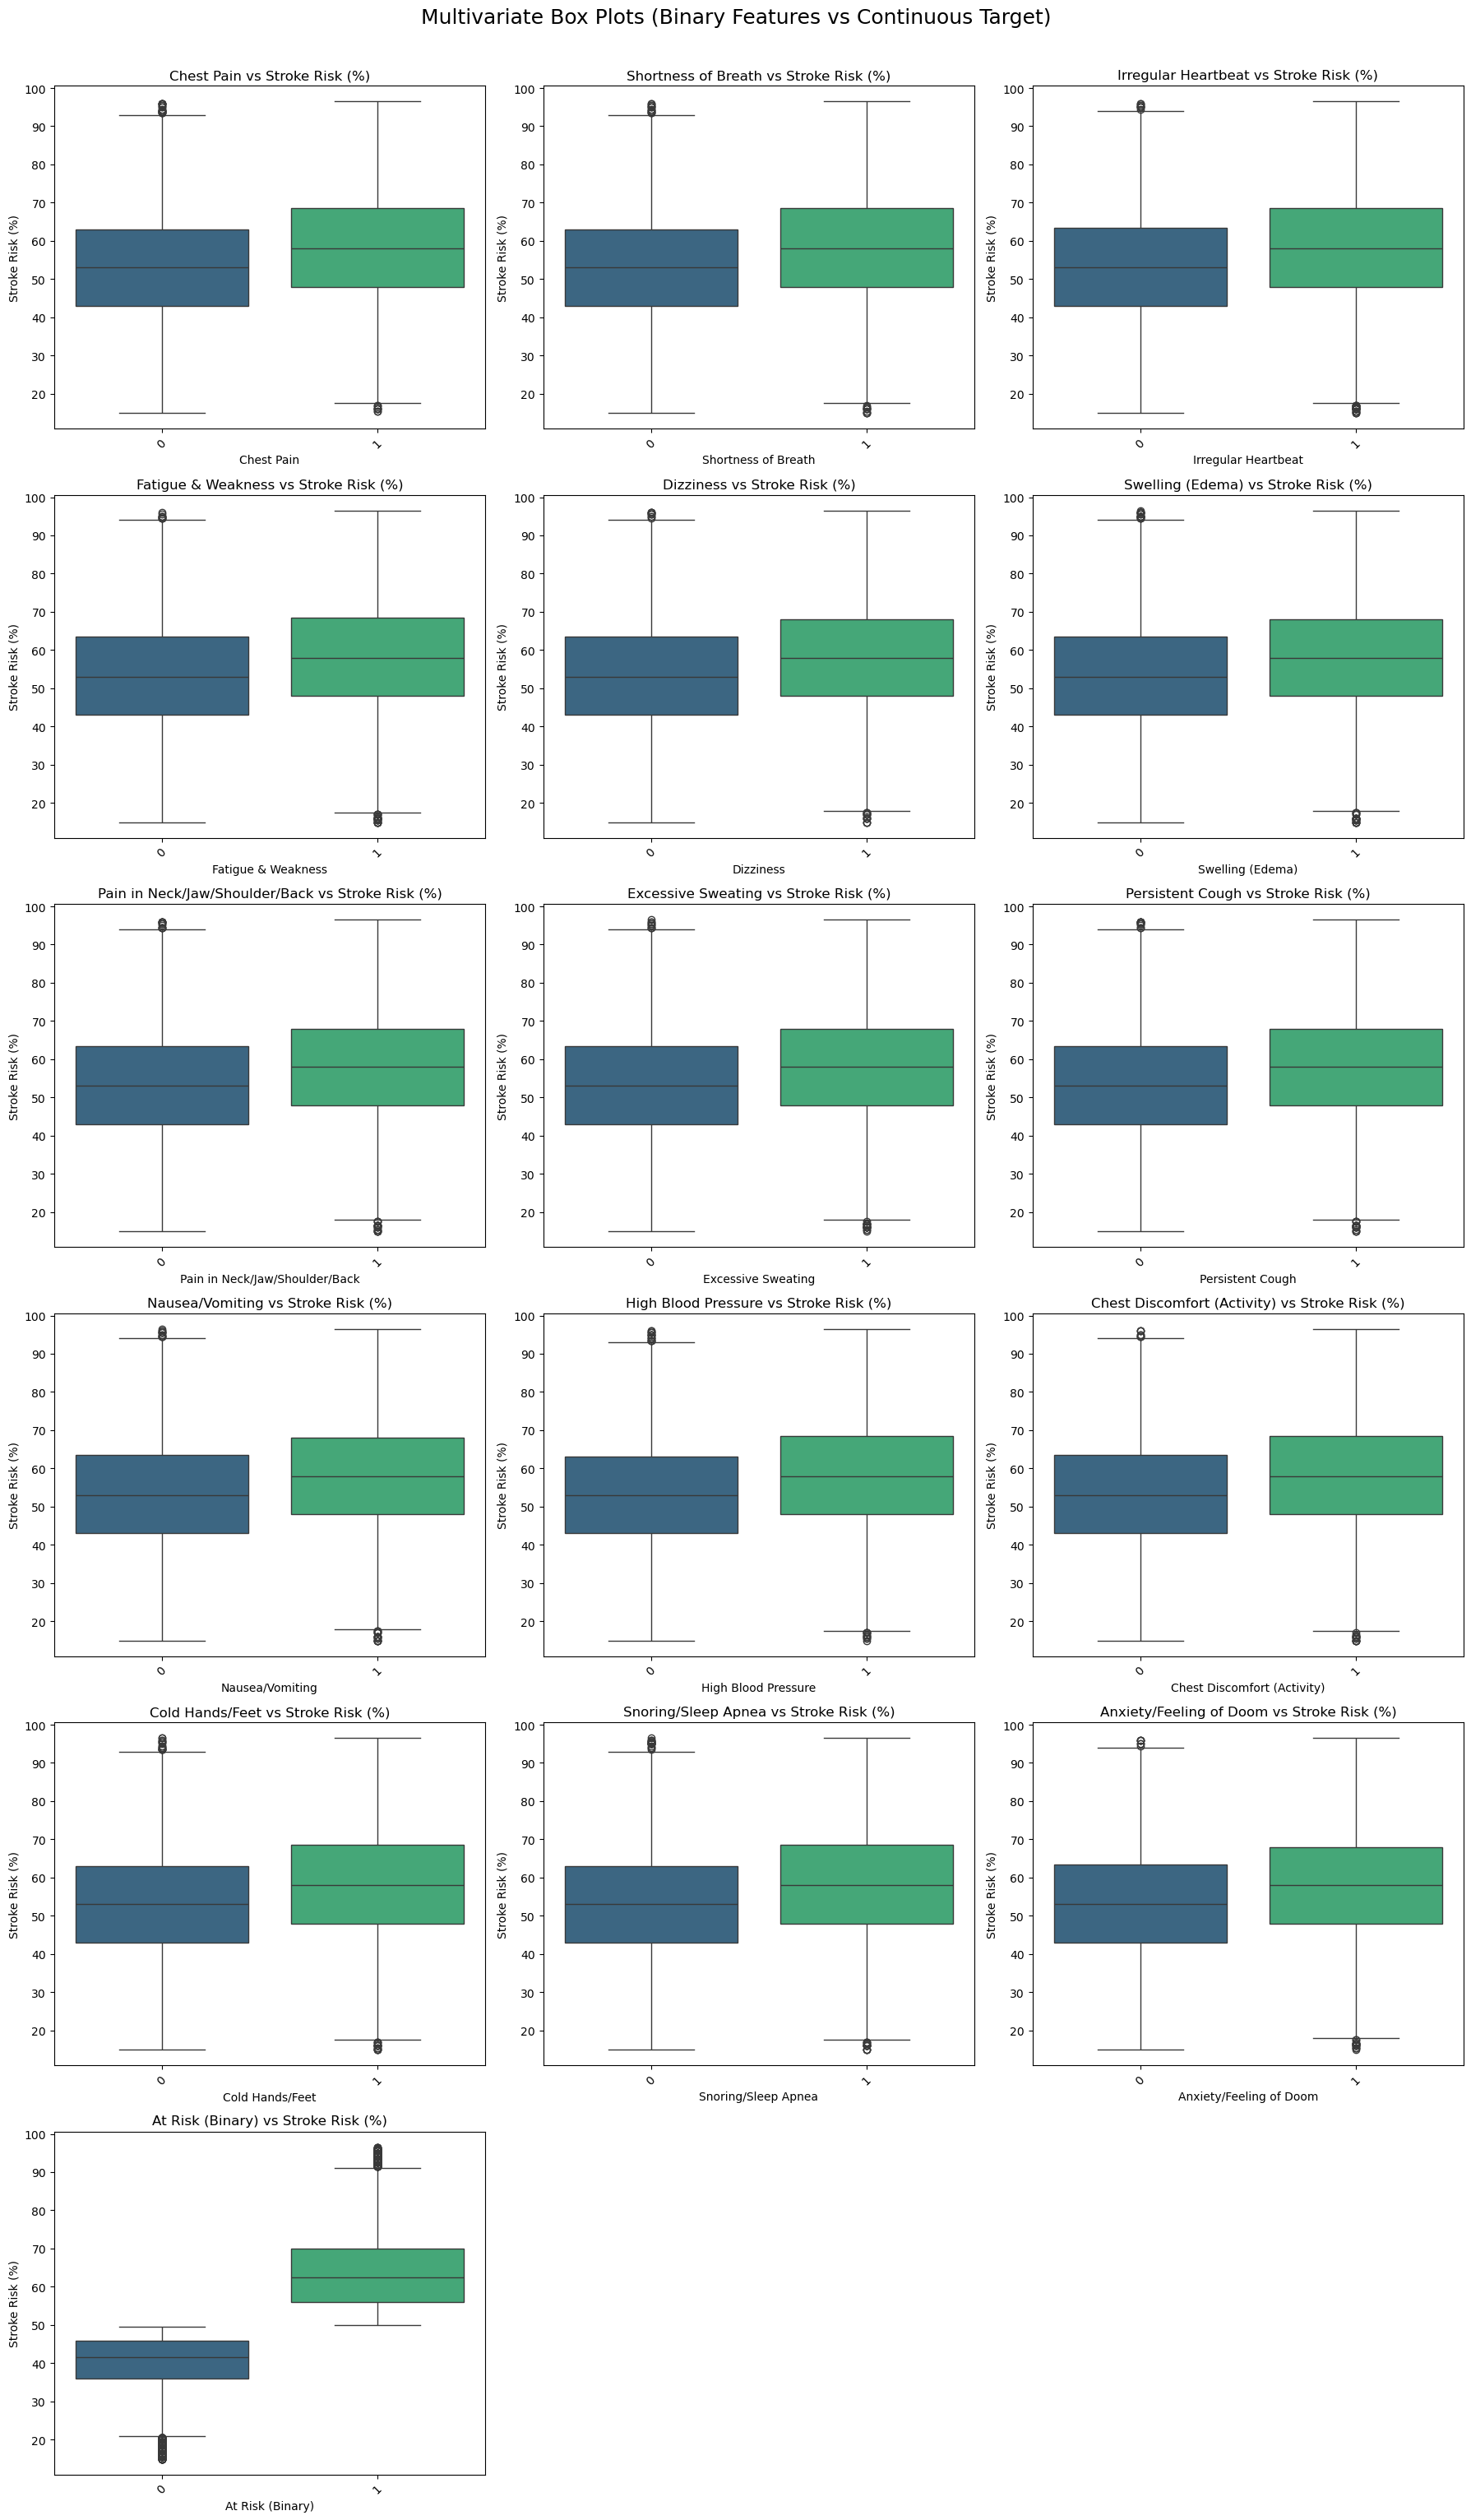

In [277]:
multivariate_boxplot_all(without_outliers)

A multivariate study of the association between a number of binary clinical characteristics and the continuous outcome variable, Stroke Risk (%), is provided by the box plots that are displayed.  For every symptom, such as dizziness, shortness of breath, irregular heartbeat, chest pain, and others, the median stroke risk is consistently higher for those who reported having the symptom (value = 1) than for those who did not (value = 0).  The distribution of stroke risk for each binary trait is noticeably larger and frequently more dispersed when symptoms are present, indicating that these disorders are linked to heightened vulnerability to stroke.

Furthermore, patients with symptoms typically have wider interquartile ranges, which suggests that there is more variation in risk within that subgroup.  The increase in both the median and upper quartile values is especially noticeable in certain aspects, such as fatigue and weakness, shortness of breath, and snoring/sleep apnea, supporting their possible importance in predictive modeling.  A significant correlation between the presence of symptoms and the risk of stroke is supported by the recurring pattern of heightened central tendency across characteristics, even though there is some overlap between groups.

Since each of these binary predictors contributes significantly to the variance in stroke risk, this study justifies their inclusion in additional statistical or machine learning models.  It also emphasizes how clinically significant these symptoms are as possible early warning signs of increased risk for stroke.
#### Multivariate data analysis
This section involves examining more than two variables simultaneously to uncover complex relationships, interactions, and patterns within my dataset.

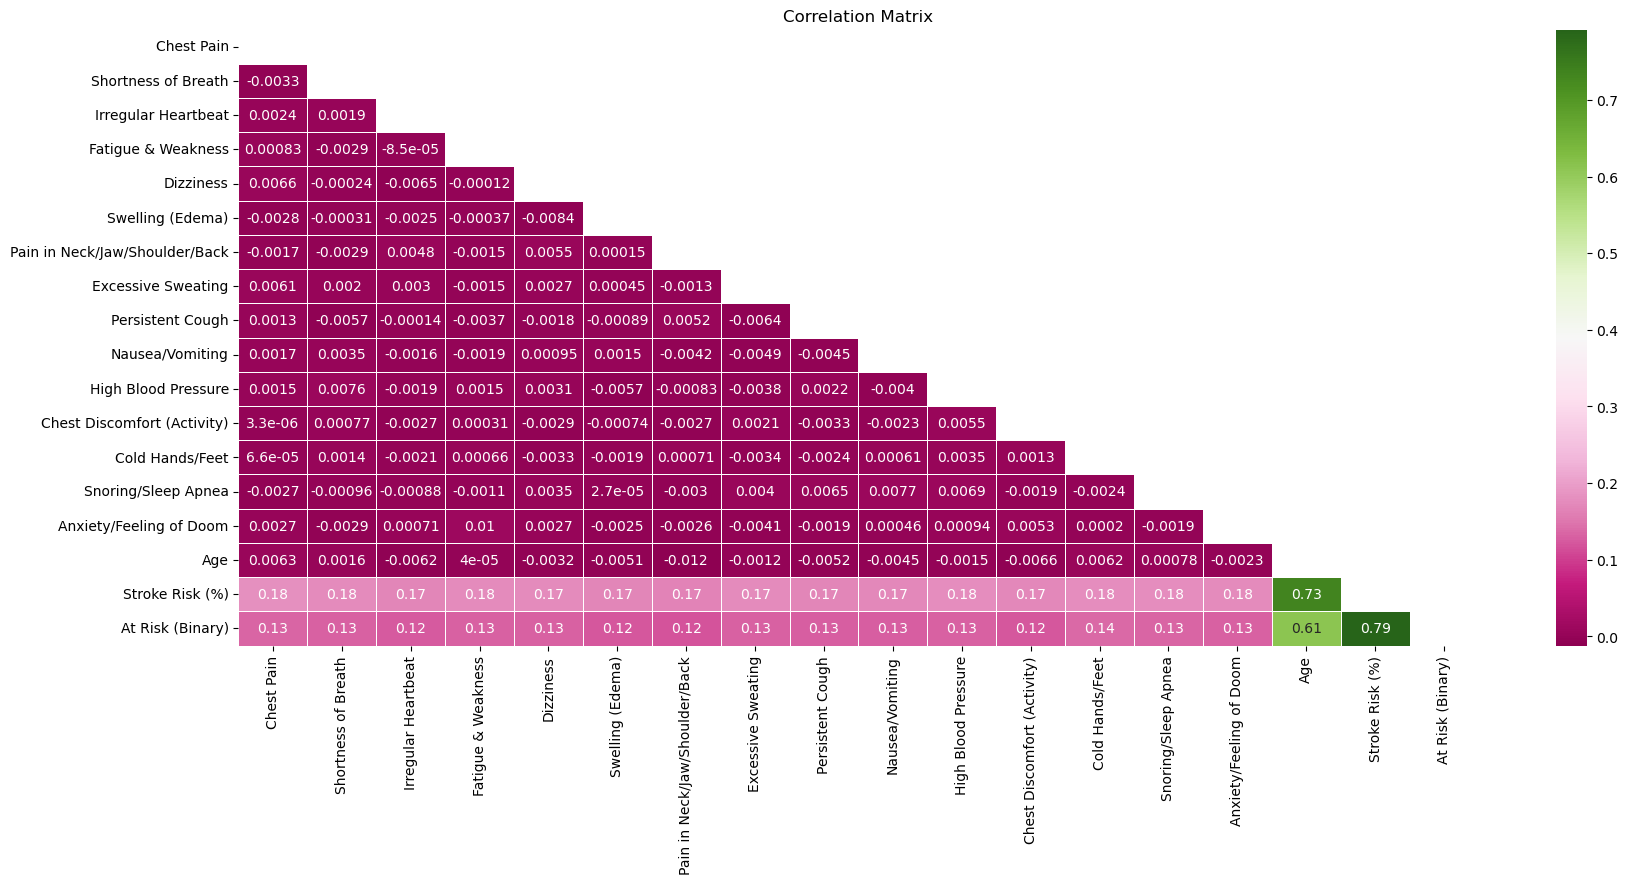

In [278]:
correlation_matrix = without_outliers.corr()
matrix = np.triu(np.ones_like(correlation_matrix, dtype = bool))
one_sided_correlation = correlation_matrix.mask(matrix)

# using heatmap to visualize the correlation
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG', linewidths=0.5, mask = matrix)
plt.title(f'Correlation Matrix')
plt.show()

This correlation matrix provides insight into the linear relationships between features in my stroke dataset. Most symptom variables like chest pain, dizziness, high blood pressure show very weak correlations with one another, as well as with the target variables Stroke Risk (%) and At Risk (Binary). Their correlation coefficients mostly range between -0.01 and 0.02, indicating near-independence. This low redundancy is actually a positive sign for model diversity, meaning these features may each contribute uniquely to prediction despite weak pairwise correlations.
However, the Age column stands out with a strong positive correlation of:

0.73 with Stroke Risk (%)

0.61 with At Risk (Binary)

These are the strongest correlations in the matrix, clearly indicating that as age increases, so does the likelihood and percentage risk of stroke. This suggests that age is a dominant predictor in my dataset. The results are not only statistically relevant but also clinically intuitive, reinforcing the biological reality that stroke risk increases with age. All in all, while most symptoms are weakly correlated with stroke outcomes, age exhibits a substantial and consistent influence, making it a key feature in both classification and regression tasks.
##### How does stroke prediction change with age?

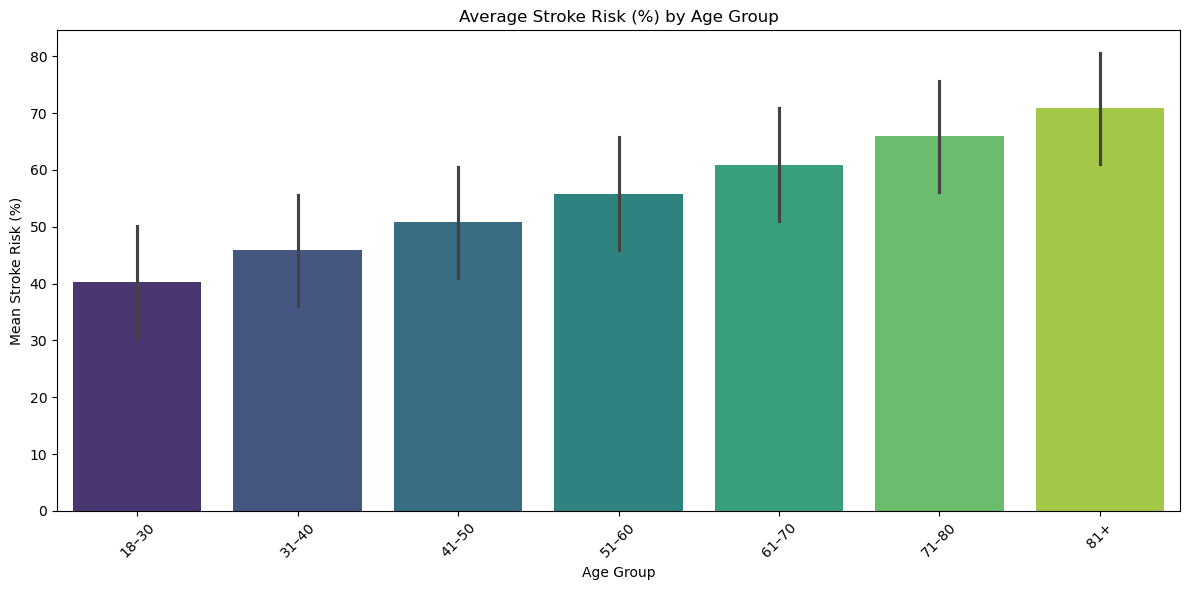

In [279]:
#create age group bins
# Define age bins and labels
bins = [18, 30, 40, 50, 60, 70, 80, 100]
labels = ['18–30', '31–40', '41–50', '51–60', '61–70', '71–80', '81+']

# Add age group column
stroke_data['Age Group'] = pd.cut(stroke_data['Age'], bins=bins, labels=labels, right=False)

#visualizing stroke risk by age group
plt.figure(figsize=(12, 6))
sns.barplot(x='Age Group', y='Stroke Risk (%)', data=stroke_data, ci='sd', palette='viridis')
plt.title('Average Stroke Risk (%) by Age Group')
plt.ylabel('Mean Stroke Risk (%)')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The association between average stroke risk and age across specified age groups is depicted by the bar plot.  It demonstrates a distinct and steady increase in stroke risk with age.  The average stroke risk is highest among those aged 81 and older, and lowest among those in the youngest age group (18–30).  The trajectory seems to be roughly linear, suggesting that the risk of stroke increases gradually as people age.  The increased diversity in stroke risk among older age groups is further highlighted by the inclusion of standard deviation error bars, which may be a reflection of a wider range of health issues in those populations.  Age is a significant predictor in stroke risk modeling, and this strong age-related pattern justifies its inclusion as a crucial feature in both regression and classification.

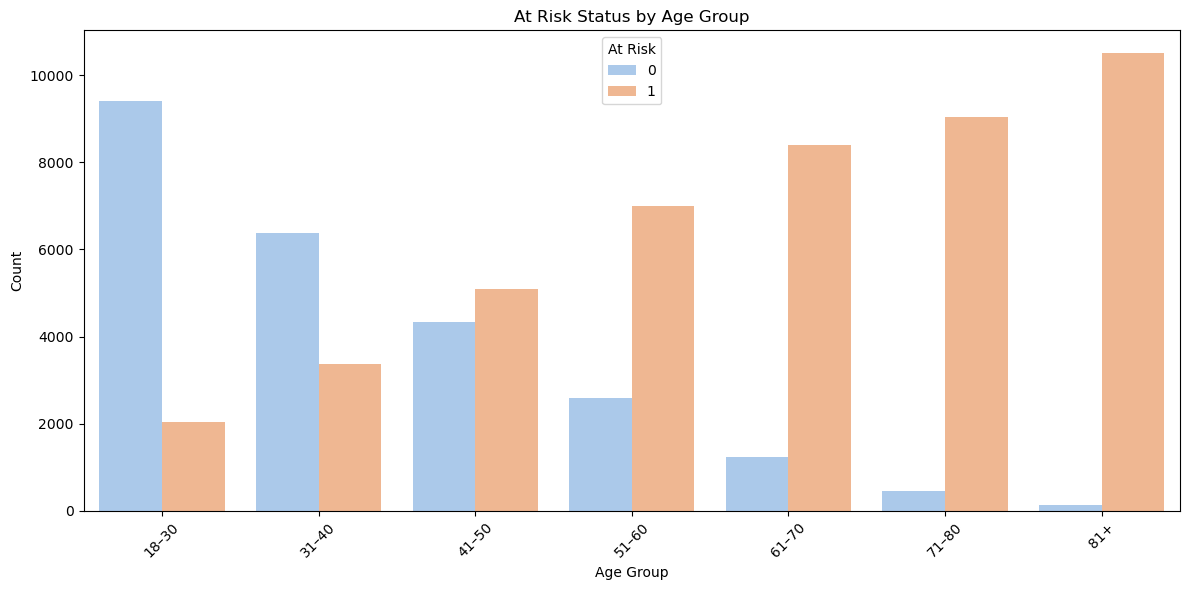

In [280]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Age Group', hue='At Risk (Binary)', data=stroke_data, palette='pastel')
plt.title('At Risk Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='At Risk')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


This second bar plot illustrates how the number of people categorized as "At Risk" (binary) varies by age group, which enhances the previous representation of average stroke risk (%).  A distinct and steady increasing trend is evident, as in the previous plot: younger age groups (such as those between the ages of 18 and 30 and 31 and 40) are primarily in the "Not at Risk" category, whereas older age groups (particularly those between the ages of 51 and 60) exhibit a sharp change, with the great majority being categorized as "At Risk."

This change in classification is noteworthy since it roughly corresponds with the rise in the mean stroke risk percentage that was previously noted.  For example, the 61–70 age group has a significant bias toward at-risk classification in addition to having a higher average stroke risk.  Age is a significant and reliable predictor of stroke susceptibility in the dataset, as demonstrated by the convergence of results from the continuous target (Stroke Risk %) and the binary target (At Risk).

When taken as a whole, these two plots support the idea that stroke risk not only rises with age but also gets more common.  This emphasizes how crucial it is to categorize stroke prevention and monitoring initiatives by age group, particularly for populations 50 years of age and older.
#### Hypothesis tests
A basic statistical method for figuring out if patterns in data are statistically significant or could have happened by accident is hypothesis testing.  To determine whether binary symptoms and the At Risk (Binary) classification are significantly correlated, I will use the Chi-Square test of independence in this investigation.  In order to determine whether there are significant differences in the mean stroke risk % between age groups, I will also perform a One-Way ANOVA test.  These tests will bolster the validity of inferences made from the dataset and offer statistical support for the patterns found in the exploratory data analysis.
##### 1. Chi-square test of independence
Finding a statistically meaningful correlation between binary symptoms and the At Risk (Binary) result is the aim of this investigation.  We can determine whether characteristics like weariness, shortness of breath, or chest pain are associated with a higher chance of being categorized as at risk by employing the Chi-Square test of independence.  Finding these correlations improves our knowledge of which symptoms might be early warning signs of stroke vulnerability.

In [ ]:
# Identify binary/categorical features (excluding the target)
binary_cols = [col for col in stroke_data.columns 
               if stroke_data[col].nunique() == 2 and col != 'At Risk (Binary)']

# Store results
chi2_results = []

for col in binary_cols:
    contingency = pd.crosstab(stroke_data[col], stroke_data['At Risk (Binary)'])
    chi2, p, dof, expected = chi2_contingency(contingency)
    chi2_results.append({'Feature': col, 'Chi2': chi2, 'p-value': p})

# Convert to DataFrame
chi2_df = pd.DataFrame(chi2_results).sort_values(by='p-value')

# Display results
print(chi2_df)


                           Feature         Chi2        p-value
12                 Cold Hands/Feet  1306.400070  4.596205e-286
0                       Chest Pain  1282.099097  8.777276e-281
13             Snoring/Sleep Apnea  1250.387813  6.836083e-274
3               Fatigue & Weakness  1238.781257  2.275940e-271
7               Excessive Sweating  1234.057726  2.419306e-270
10             High Blood Pressure  1224.696437  2.618904e-268
14         Anxiety/Feeling of Doom  1209.284741  5.854264e-265
1              Shortness of Breath  1191.245047  4.875291e-261
4                        Dizziness  1190.538879  6.941791e-261
8                 Persistent Cough  1158.927643  5.147517e-254
9                  Nausea/Vomiting  1157.932905  8.468151e-254
2              Irregular Heartbeat  1078.405935  1.630324e-236
11     Chest Discomfort (Activity)  1069.563673  1.361856e-234
5                 Swelling (Edema)  1048.487300  5.189445e-230
6   Pain in Neck/Jaw/Shoulder/Back  1012.209904  3.9837

Each binary symptom and the At Risk (Binary) outcome have a very significant correlation, according to the results of the Chi-Square test.  Since the p-values for all features are incredibly small (much below 0.05), there is very little probability that these differences could have been seen by accident.  This demonstrates that every symptom, including fatigue and weakness, snoring or sleep apnea, chest pain, and cold hands or feet, is statistically associated with the classification of stroke risk.

Chest pain and cold hands/feet have the highest Chi-Square scores among the features, indicating that they are most strongly associated with the At Risk label in your dataset.  These results support previous visual patterns and confirm that the symptoms you utilized in your model are statistically significant and clinically relevant indicators of stroke vulnerability.
##### 2. Analysis over Variance(ANOVA)
Finding out if there are significant differences in the mean stroke risk (%) between age groups is the goal of the ANOVA test in this situation.  This is significant since my visualizations clearly demonstrate that the risk of stroke increases with age.  ANOVA offers a statistical technique to confirm if the observed differences are significant and not the result of chance variation, even though the bar plot indicates a pattern.  My claim that age is a major predictor of stroke risk is strengthened by statistical confirmation of this link.

In [ ]:
groups = [group['Stroke Risk (%)'] for name, group in stroke_data.groupby('Age Group')]
f_stat, p_val = f_oneway(*groups)
print(f"F-statistic: {f_stat}, p-value: {p_val}")

F-statistic: 13062.722790471213, p-value: 0.0


The ANOVA test returned an F-statistic of 13062.72 and a p-value of 0.0, indicating a highly significant result. This means that the differences in mean stroke risk (%) across the age groups are not due to chance. Therefore, age has a statistically significant effect on stroke risk, confirming the pattern observed in the earlier visualizations.
#### MODELLING
Based on the collection of binary symptoms in the dataset, I will tackle two predicted issues in the modeling stage of this study: regression and classification.  While the regression job focuses on estimating the Stroke Risk (%) as a continuous variable, the classification challenge entails predicting the At Risk (Binary) outcome.  To guarantee reliable performance and comparative analysis, I will apply a variety of models for every work.  In particular, I'll employ one ensemble model, one neural model, and two classical models.  I may investigate the advantages of each modeling category using this method, ranging from interpretability and simplicity to advanced pattern recognition and nonlinearity handling.
##### Data preparation


In [298]:
#splitting data to train and test sets
regression_data = without_outliers.drop(columns=['At Risk (Binary)'], axis = 1)
#classification_data
classification_data = without_outliers.drop(columns=['Stroke Risk (%)'], axis = 1)

##### Classification Modelling


In [ ]:
# Define features and target
X = classification_data.drop(columns=['At Risk (Binary)'])  # features for regression
y = classification_data['At Risk (Binary)']  # target for regression

# Split into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# Scale Age column only
scaler = StandardScaler()
X_train['Age'] = scaler.fit_transform(X_train[['Age']])
X_test['Age'] = scaler.transform(X_test[['Age']])

# Confirm shapes
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)

Train size: (48949, 16)
Test size: (20979, 16)


##### Baseline logistic regression

Baseline Logistic Regression Results:
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7260
           1       1.00      1.00      1.00     13719

    accuracy                           1.00     20979
   macro avg       1.00      1.00      1.00     20979
weighted avg       1.00      1.00      1.00     20979



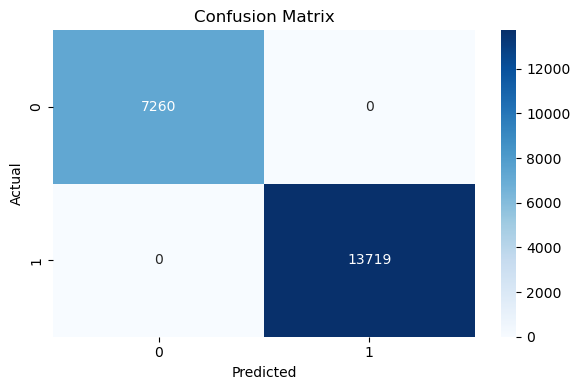

In [301]:
# Train baseline logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict
y_pred = logreg.predict(X_test)

# Evaluation
print("Baseline Logistic Regression Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

# Plot using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()


##### Tuned Logistic regression

/home/ezra/anaconda3/envs/DS/lib/python3.12/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Tuned Logistic Regression Results:
Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7260
           1       1.00      1.00      1.00     13719

    accuracy                           1.00     20979
   macro avg       1.00      1.00      1.00     20979
weighted avg       1.00      1.00      1.00     20979



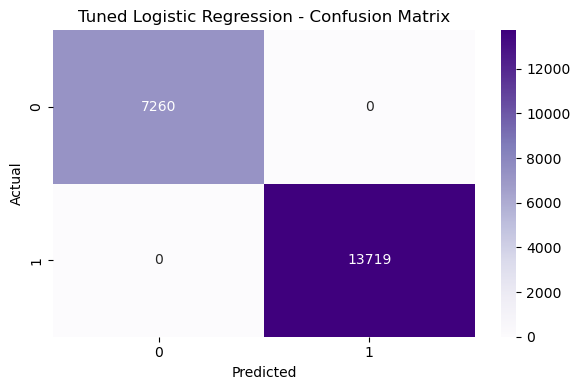

In [ ]:
# Define parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],            # Regularization
    'C': [0.01, 0.1, 1, 10],            # Inverse of regularization strength
    'solver': ['liblinear'],           # Solver compatible with L1 and L2
    'max_iter': [100, 200, 500]
}

# Initialize logistic regression
log_reg = LogisticRegression()

# Grid search with cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Predict
y_pred = best_model.predict(X_test)

# Evaluation
print("Tuned Logistic Regression Results:")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Tuned Logistic Regression - Confusion Matrix")
plt.tight_layout()
plt.show()


##### SVM

Baseline SVM Results:
Accuracy: 0.9930406597073264

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      7260
           1       0.99      1.00      0.99     13719

    accuracy                           0.99     20979
   macro avg       0.99      0.99      0.99     20979
weighted avg       0.99      0.99      0.99     20979



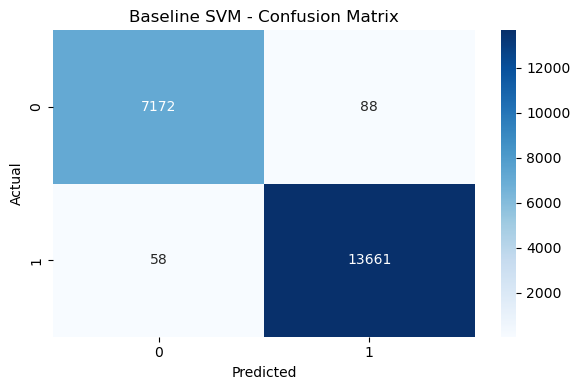

In [ ]:
# Baseline SVM model
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

# Predict
y_pred = svm_clf.predict(X_test)

# Evaluate
print("Baseline SVM Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Baseline SVM - Confusion Matrix")
plt.tight_layout()
plt.show()


##### Tuned SVM

Tuned SVM Results:
Best Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.9992849992849993

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7260
           1       1.00      1.00      1.00     13719

    accuracy                           1.00     20979
   macro avg       1.00      1.00      1.00     20979
weighted avg       1.00      1.00      1.00     20979



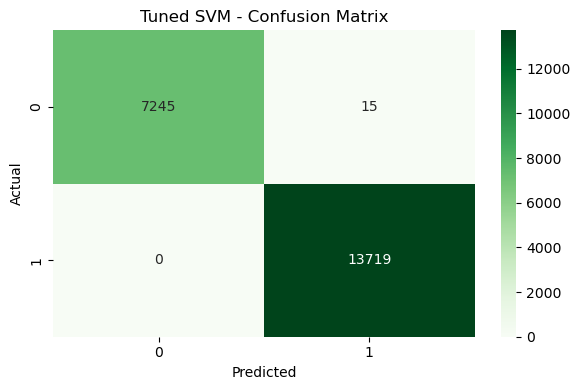

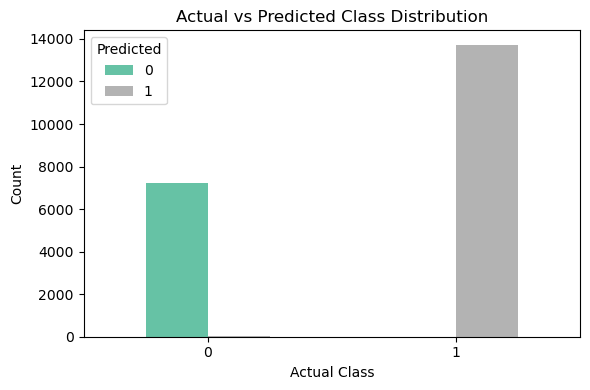

In [ ]:
# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],             # Regularization strength
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto']           # Kernel coefficient
}

# GridSearch with 5-fold CV
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_svm = grid_search.best_estimator_

# Predict
y_pred_tuned = best_svm.predict(X_test)

# Evaluate
print("Tuned SVM Results:")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Tuned SVM - Confusion Matrix")
plt.tight_layout()
plt.show()



#for plotting
comparison_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_tuned
})

# Count occurrences
counts = comparison_df.value_counts().unstack().fillna(0)

# Plot
counts.plot(kind='bar', figsize=(6, 4), colormap='Set2')
plt.title("Actual vs Predicted Class Distribution")
plt.xlabel("Actual Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.legend(title="Predicted")
plt.tight_layout()
plt.show()



##### Random forest

Baseline Random Forest Results:
Accuracy: 0.9494732828066161

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93      7260
           1       0.95      0.97      0.96     13719

    accuracy                           0.95     20979
   macro avg       0.95      0.94      0.94     20979
weighted avg       0.95      0.95      0.95     20979



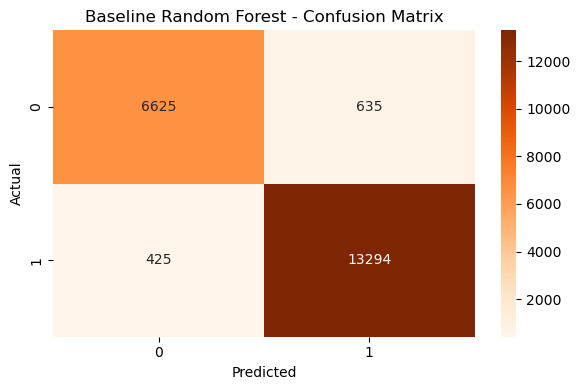

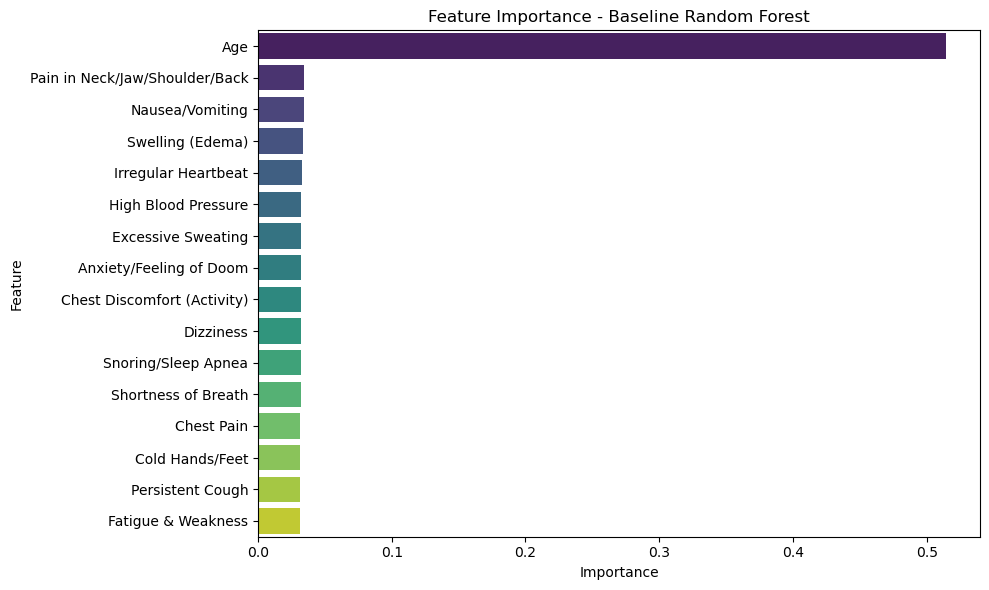

In [ ]:
# Baseline Random Forest
rf_clf = RandomForestClassifier(random_state=100)
rf_clf.fit(X_train, y_train)

# Predict
y_pred = rf_clf.predict(X_test)

# Evaluate
print("Baseline Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Baseline Random Forest - Confusion Matrix")
plt.tight_layout()
plt.show()

# Feature Importance Plot (without creating a DataFrame)
importances = rf_clf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns[indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names, palette='viridis')
plt.title("Feature Importance - Baseline Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


##### Tuned Random forest

Tuned Random Forest Results:
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9503789503789504

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.91      0.93      7260
           1       0.95      0.97      0.96     13719

    accuracy                           0.95     20979
   macro avg       0.95      0.94      0.94     20979
weighted avg       0.95      0.95      0.95     20979



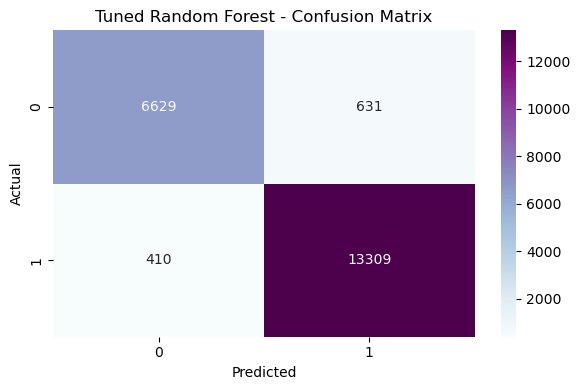

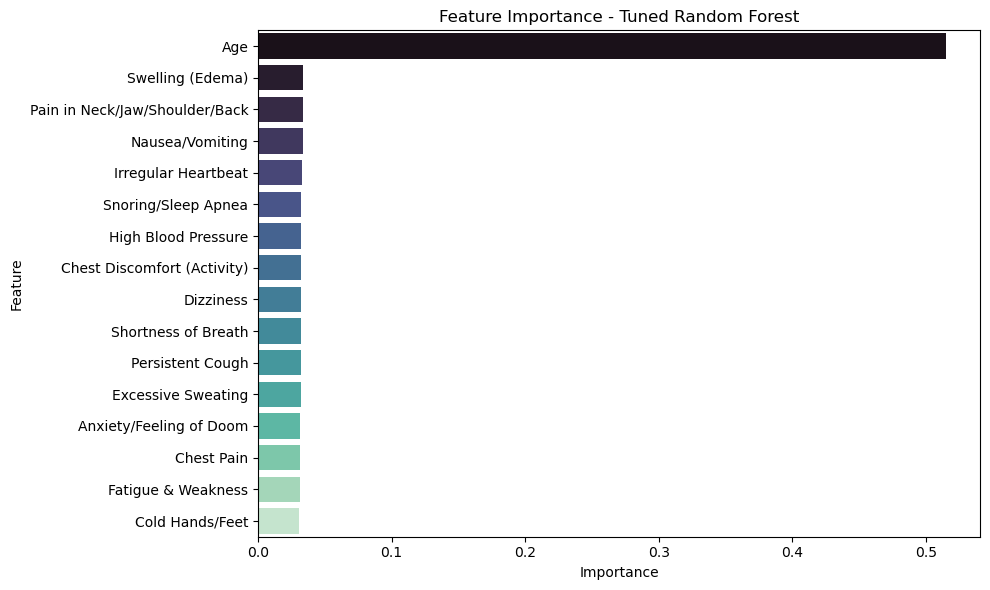

In [306]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['auto', 'sqrt']
}

# GridSearchCV for tuning
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, 
            cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best estimator
best_rf = grid_search.best_estimator_

# Predict
y_pred_tuned = best_rf.predict(X_test)

# Evaluation
print("Tuned Random Forest Results:")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_tuned))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tuned))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_tuned)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Tuned Random Forest - Confusion Matrix")
plt.tight_layout()
plt.show()

# Feature Importance Plot (No DataFrame)
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_train.columns[indices]

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[indices], y=feature_names, palette='mako')
plt.title("Feature Importance - Tuned Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


##### Neural classifier

In [331]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


# Baseline model
baseline_model = Sequential([
    Dense(32, input_dim=X_train.shape[1], activation='relu'),
    Dense(1, activation='sigmoid')
])

baseline_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train model
history = baseline_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0, validation_data=(X_test, y_test))

# Evaluate
y_pred = (baseline_model.predict(X_test) > 0.5).astype("int32")

print("Baseline Neural Network Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Neural Network - Confusion Matrix")
plt.tight_layout()
plt.show()


InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run Cast: CUDA error: Error recording CUDA event: CUDA_ERROR_LAUNCH_FAILED: unspecified launch failure [Op:Cast] name: 

##### Rergression modelling


In [312]:

# Define features and target
X_reg = regression_data.drop(columns=["Stroke Risk (%)"])  # features for regression
y_reg = regression_data["Stroke Risk (%)"]  # target for regression

# Split into train and test sets (80% train, 20% test)
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, test_size=0.3, random_state=100)

# Scale Age column only
scaler = StandardScaler()
X_reg_train['Age'] = scaler.fit_transform(X_train[['Age']])
X_reg_test['Age'] = scaler.transform(X_test[['Age']])

# Confirm shapes
print("Train size:", X_reg_train.shape)
print("Test size:", X_reg_test.shape)

Train size: (48949, 16)
Test size: (20979, 16)


##### Baseline Linear regression

In [314]:
#vanilla model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

regression_model = LinearRegression()
regression_model.fit(X_reg_train, y_reg_train)

# Predictions
y_reg_pred = regression_model.predict(X_reg_test)

# Evaluation
print("Baseline MSE:", mean_squared_error(y_reg_test, y_reg_pred))
print("Baseline R²:", r2_score(y_reg_test, y_reg_pred))
print("Baseline MAE:", mean_absolute_error(y_reg_test, y_reg_pred))

Baseline MSE: 1.5431200751360331e-28
Baseline R²: 1.0
Baseline MAE: 9.152738097858337e-15


##### Tuned Linear regression

In [330]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Define parameter grids
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}

# Grid Search for Ridge
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

# Grid Search for Lasso
lasso_grid = GridSearchCV(Lasso(), lasso_params, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_reg_train, y_reg_train)

# Evaluate both models
models = {
    'Ridge': ridge_grid.best_estimator_,
    'Lasso': lasso_grid.best_estimator_
}

for name, model in models.items():
    y_reg_pred = model.predict(X_reg_test)
    print(f"\n{name} Regression (Best alpha = {model.alpha}):")
    print(f"R² Score: {r2_score(y_reg_test, y_reg_pred):.4f}")
    print(f"Mean Squared Error: {mean_squared_error(y_reg_test, y_reg_pred):.2f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_reg_test, y_reg_pred):.2f}")



Ridge Regression (Best alpha = 10):
R² Score: -14.9974
Mean Squared Error: 3229.91
Mean Absolute Error: 55.12

Lasso Regression (Best alpha = 0.01):
R² Score: 1.0000
Mean Squared Error: 0.01
Mean Absolute Error: 0.06


##### Random forest regressor

In [333]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Baseline model with default parameters
rf_baseline = RandomForestRegressor(random_state=42)
rf_baseline.fit(X_reg_train, y_reg_train)

# Predict
y_pred_rf = rf_baseline.predict(X_reg_test)

# Evaluate
print("Baseline Random Forest Regressor:")
print("R² Score:", r2_score(y_reg_test, y_pred_rf))
print("Mean Squared Error:", mean_squared_error(y_reg_test, y_pred_rf))
print("Mean Absolute Error:", mean_absolute_error(y_reg_test, y_pred_rf))



Baseline Random Forest Regressor:
R² Score: 0.9619864073964601
Mean Squared Error: 7.675017276800609
Mean Absolute Error: 2.1945359645359646


##### Tuned Random forest regressor

In [334]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=100),
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

# Fit the model
grid_search_rf.fit(X_reg_train, y_reg_train)

# Best model from grid search
best_rf_model = grid_search_rf.best_estimator_

# Predict
y_pred_best_rf = best_rf_model.predict(X_reg_test)

# Evaluate
print("Tuned Random Forest Regressor:")
print("Best Parameters:", grid_search_rf.best_params_)
print("R² Score:", r2_score(y_reg_test, y_pred_best_rf))
print("Mean Squared Error:", mean_squared_error(y_reg_test, y_pred_best_rf))
print("Mean Absolute Error:", mean_absolute_error(y_reg_test, y_pred_best_rf))


Tuned Random Forest Regressor:
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
R² Score: 0.9665538755048975
Mean Squared Error: 6.752836702891148
Mean Absolute Error: 2.0417724797626757


##### Gradient boosting regressor

Baseline Gradient Boosting Regressor:
R² Score: 0.9797757382790818
Mean Squared Error: 4.083317242267953
Mean Absolute Error: 1.6096916086007822


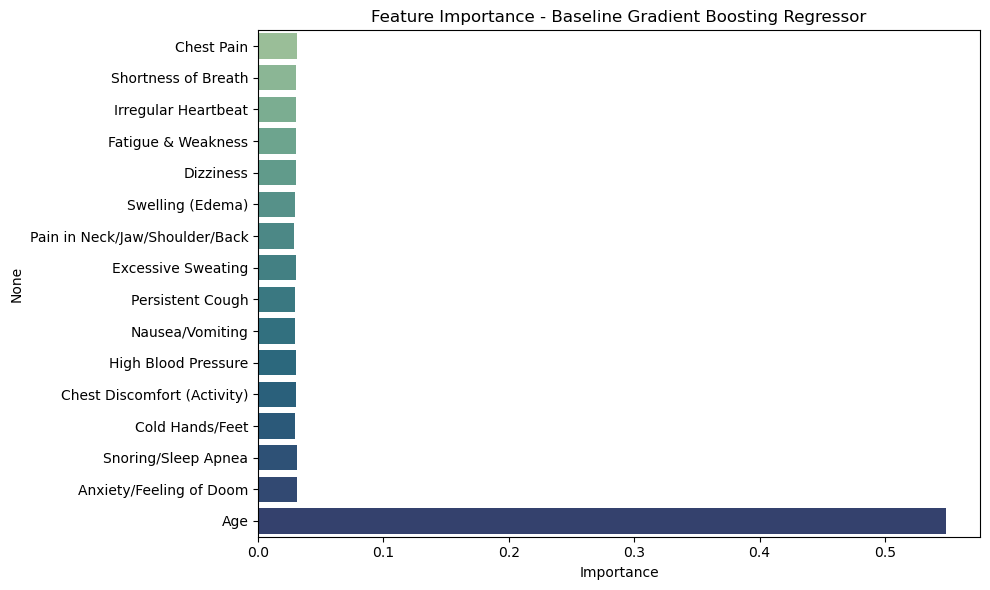

In [321]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train baseline model
gbr_baseline = GradientBoostingRegressor(random_state=42)
gbr_baseline.fit(X_reg_train, y_reg_train)

# Predict
y_pred_baseline = gbr_baseline.predict(X_reg_test)

# Evaluate
print("Baseline Gradient Boosting Regressor:")
print("R² Score:", r2_score(y_reg_test, y_pred_baseline))
print("Mean Squared Error:", mean_squared_error(y_reg_test, y_pred_baseline))
print("Mean Absolute Error:", mean_absolute_error(y_reg_test, y_pred_baseline))

# Feature Importance Plot
feature_importance = gbr_baseline.feature_importances_
features = X_train.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=features, palette="crest")
plt.title("Feature Importance - Baseline Gradient Boosting Regressor")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


##### Tuned Gradient boosting regressor


Tuned Gradient Boosting Regressor:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.5}
R² Score: 0.8015906092959341
Mean Squared Error: 0.044900557596861804
Mean Absolute Error: 0.15013790048347272


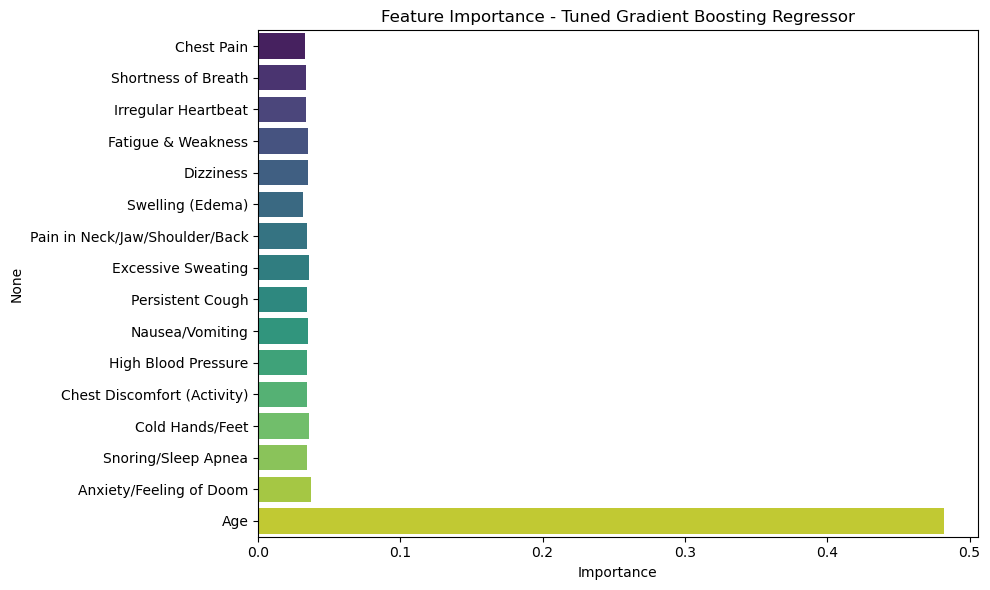

In [322]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.01],
    'max_depth': [3, 5, 7],
    'subsample': [0.5, 0.8, 1.0]
}

# Grid search
gbr = GradientBoostingRegressor(random_state=100)
grid_search = GridSearchCV(gbr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_gbr = grid_search.best_estimator_
y_pred_tuned = best_gbr.predict(X_test)

# Evaluate
print("\nTuned Gradient Boosting Regressor:")
print("Best Parameters:", grid_search.best_params_)
print("R² Score:", r2_score(y_test, y_pred_tuned))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_tuned))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_tuned))

# Feature Importance Plot
importances = best_gbr.feature_importances_

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features, palette="viridis")
plt.title("Feature Importance - Tuned Gradient Boosting Regressor")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()


##### Vanilla MLP regressor

In [323]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Baseline model with default settings
mlp_baseline = MLPRegressor(random_state=42, max_iter=500)
mlp_baseline.fit(X_reg_train, y_reg_train)

# Predict
y_pred_baseline = mlp_baseline.predict(X_reg_test)

# Evaluation
print("Baseline MLP Regressor:")
print("R² Score:", r2_score(y_reg_test, y_pred_baseline))
print("Mean Squared Error:", mean_squared_error(y_reg_test, y_pred_baseline))
print("Mean Absolute Error:", mean_absolute_error(y_reg_test, y_pred_baseline))


Baseline MLP Regressor:
R² Score: 0.9999991402061247
Mean Squared Error: 0.00017359403296481423
Mean Absolute Error: 0.0058731610353271015


##### Tuned MLP regressor

In [324]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid = {
    'hidden_layer_sizes': [(64,), (64, 32), (128, 64)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],  # L2 regularization
    'learning_rate': ['constant', 'adaptive']
}

mlp = MLPRegressor(max_iter=500, random_state=42)
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='r2', n_jobs=-1)
grid_search.fit(X_reg_train, y_reg_train)

# Best model
best_mlp = grid_search.best_estimator_
y_pred_tuned = best_mlp.predict(X_reg_test)

# Evaluation
print("\nTuned MLP Regressor:")
print("Best Parameters:", grid_search.best_params_)
print("R² Score:", r2_score(y_reg_test, y_pred_tuned))
print("Mean Squared Error:", mean_squared_error(y_reg_test, y_pred_tuned))
print("Mean Absolute Error:", mean_absolute_error(y_reg_test, y_pred_tuned))


/home/ezra/anaconda3/envs/DS/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ezra/anaconda3/envs/DS/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/home/ezra/anaconda3/envs/DS/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed t


Tuned MLP Regressor:
Best Parameters: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (64,), 'learning_rate': 'constant', 'solver': 'lbfgs'}
R² Score: 0.9999997808031711
Mean Squared Error: 4.425626028605893e-05
Mean Absolute Error: 0.002454109327300853


## Models Discussion


### Best Model

### Challenges

### Conclusions

### Recommendations

### Next steps